# <font color="purple"> Evaluation of Commercial Diesel Vehicles on Oregon Roads</font>

* This is a breakdown of vehicles on Oregon roads that have models older than 2008 when filtering was required
* Other components might be evaluated as well like the makes, the class of vehicles, and more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files as fls
import os

<font size="4" color="blue">Right now, this is set up so that you need to go to Github (store csv files there) and get raw files</font>

* Save the file to your repository and go to that .csv and hit "Raw" to get a raw URL
* Copy that addrss into the "pd.read_csv()" functions below. You can then run this cell after running the one above

<font size="2">*You will see the records below; and note you don't have to use Github, it might work better to work from a local folder so you don't have to refresh and get new raw files each time.*</font>

In [4]:
resp = input("Are you analyzing the set of vehicles less than 26000 lbs? (Enter \"Y\" or \"N\")")
if resp == "Y":
  truck_data = pd.read_csv("https://raw.githubusercontent.com/AxisMeetsWorld/OregonTruckPol/main/Condensed%20Set%20Cascadia%20Action%20Diesel.csv?token=GHSAT0AAAAAACKSCNQCMMIRW7TUYMSK3AQ4ZMUVIPA", header=0)
else:
  if os.path.isfile("Condensed_Set_Cascadia_Action_Diesel_Ovr_26000.csv"):
    print("All required files present")
  else:
    # fls.upload()
    truck_data = pd.read_csv("https://raw.githubusercontent.com/AxisMeetsWorld/OregonTruckPol/main/Condensed_Set_Cascadia_Action_Diesel_Ovr_26000.csv?token=GHSAT0AAAAAACKSCNQDARVUNJR3ICD7IU4AZMLLXKQ", header=0)

  truck_data = pd.read_csv('/content/Condensed_Set_Cascadia_Action_Diesel_Ovr_26000.csv')
truck_data.head(10)

Are you analyzing the set of vehicles less than 26000 lbs? (Enter "Y" or "N")Y


Owner Name Customer Type  \
0                             BONANZA VIEW DAIRY INC      Business   
1                                      ROLLING O INC      Business   
2  GOODWILL INDUSTRIES OF THE COLUMBIA WILLAMETTE...      Business   
3  GOODWILL INDUSTRIES OF THE COLUMBIA WILLAMETTE...      Business   
4                           SCAPPOOSE SAND/GRAVEL CO      Business   
5                                         MICROALARA      Business   
6                         TOWN/COUNTRY ANIMAL CLINIC      Business   
7                              TAYLOR METAL PRODUCTS      Business   
8                        PROTOCOL INSURANCE SERVICES      Business   
9                                K D SAND/GRAVEL INC      Business   

              Plate Type  Year  Make Model           Use Type Vehicle Type  
0                   Farm  1980  AMGN   NaN  No Valid Use Type           TK  
1         No Valid Plate  2009  FRHT   125  No Valid Use Type           TK  
2  Charitable/Non-Profit  1996  FRHT   F70              Truck           TK  
3  Charitable/Non-Profit  2018  FRHT    M2              Truck           TK  
4         No Valid Plate  2007  PTRB   385  No Valid Use Type           TK  
5                  Truck  1995   ISU   NPR              Truck           TK  
6                   Tree  2003  FORD   F35          Passenger           AU  
7         No Valid Plate  2007  FRHT   COL  No Valid Use Type           TK  
8         No Valid Plate  1993  FORD   FSD  No Valid Use Type           TK  
9         No Valid Plate  2002  INTL   94I  No Valid Use Type           TK

<font color="skyblue" size="4">**Filter this for vehicles older than 2008, separate into two groups, and note the counts for QA**</font>

<font color="blue" size="3">Below that you will get the counts (Truck Count) per group and have 2 new sets for those. You can just run both cells.</font>

In [5]:
old=truck_data[truck_data['Year']<2008]
new=truck_data[truck_data['Year']>=2008]
#Unique collection of owners (unfiltered data)
Owners=pd.DataFrame(old['Owner Name'].unique()) #for big trucks it is "carriername" but this should be fixed
#Unique collection of owners (filtered data)
Owners_new=pd.DataFrame(new['Owner Name'].unique())
print(f'Filtered vehicle owner count: {Owners_new.count()}, and non-filtered count: {Owners.count()}')

Filtered vehicle owner count: 0    21856
dtype: int64, and non-filtered count: 0    39204
dtype: int64


In [6]:
# Owners.to_csv("D:\All Owners.csv")
def Get_counts(set_df):
  non_filt = pd.DataFrame(set_df.groupby('Owner Name')['Owner Name'].agg('count'))
  new_ind = np.arange(0,len(non_filt),1)
  non_filt.rename(columns={'Owner Name':'Truck Count'},inplace=True)
  non_filt['Owner Name']=non_filt.index
  non_filt.set_index(new_ind, inplace=True)
  # reset the order of the columns
  cols = ['Owner Name','Truck Count']
  non_filt = non_filt[cols]
  return non_filt

non_filt = Get_counts(old)
filtered = Get_counts(new)


<font color="skyblue" size = 4>This part is exploritory and was aimed at figuring out percentage breakdowns</font>

<font color="skyblue" size = 3>*If quartiles weren't the best option this would be necessary, but it was determined there wasn't any real benefit to splitting elsewhere.*
</font>


* <font color="purple">First I set up a small list of say 65% through 95% in 10% increments to see how many records you need for each.</font>
* <font color="purple">Second, I created a function to sort the old dataframe on "Truck count" and add a column that showed the cummulative sum of the total trucks.
  * The function created new dataframes that showed splits at the respective percentage cuttoffs. You can see those dataframes created as **df1_nf**, **df2_f** for non-filtered, and filtered respectively.</font>
* <font color="purple">Lastly, I used the comparisons between the amount of records near those cutoffs to see if there were any noticable "jumps" in data.</font>
  * <font color="purple">In my analysis, I saw a desired jump for the filtered data, but that was it. Here, to *hopefully* make things easier, I set up a cell that tells you what the truck count cut offs are, and what cumulative percentages you will see if you took one more than the 75% cut off or one less. That way you can see which is closer to the 75% cut off and take that bound in the second cell.</font>

* <font color="blue">The only thing to do here after running the function, is take non_filt and filtered datasets (**df2_nf**, **df2_f**) and use the "Truck Count" metrics from there to see where the cuttoffs are. Plug that into the next cell.</font>
<font size = "2">*If you really want to explore other drop-offs you can use .iloc[] filtering logic on the other datasets, but only the truck counts of those specified are necessary.*</font>

In [45]:
#Set up percentages and total truck counts from both groups
percents = pd.DataFrame(np.arange(0.65,1,0.10)) #note these are exclusive so needed to go up to 100%
percents_f = pd.DataFrame(np.arange(0.65,1,0.10))
percents.rename(columns={0:"Percent"}, inplace=True)
percents_f.rename(columns={0:"Percent"}, inplace=True)
tot_nf = non_filt['Truck Count'].sum().astype(int)
tot_f = filtered['Truck Count'].sum().astype(int)

#Now get the percentages (note we need to do something for percents here as they are both giving the same number and it is working for _f)
percents['Amount of records']=(percents['Percent']*tot_nf).astype(int)
percents_f['Amount of records']=(percents_f['Percent']*tot_f).astype(int)
percents['Amount of records']=(percents['Percent']*tot_nf).astype(int)


#Now sort the cumulative sort a column for the cummulative sum of the trucks based on the different percentages
def cumSum_sort(sum_df, f: bool):
  sum_df.sort_values(by='Truck Count', ascending=False, inplace=True)
  sum_df['Cumulative sum']=sum_df.loc[:,'Truck Count'].cumsum()

  match f:
    case False:
      sum_df['Cumulative %']=sum_df.loc[:,'Cumulative sum']/tot_nf

      df1=sum_df[sum_df['Cumulative sum']<=percents.iloc[0,1].astype(int)]
      df2=sum_df[sum_df['Cumulative sum']<=percents.iloc[1,1].astype(int)]
      df3=sum_df[sum_df['Cumulative sum']<=percents.iloc[2,1].astype(int)]
      df4=sum_df[sum_df['Cumulative sum']<=percents.iloc[3,1].astype(int)]
    case True:
      sum_df['Cumulative %']=sum_df.loc[:,'Cumulative sum']/tot_f

      df1=sum_df[sum_df['Cumulative sum']<=percents_f.iloc[0,1].astype(int)]
      df2=sum_df[sum_df['Cumulative sum']<=percents_f.iloc[1,1].astype(int)]
      df3=sum_df[sum_df['Cumulative sum']<=percents_f.iloc[2,1].astype(int)]
      df4=sum_df[sum_df['Cumulative sum']<=percents_f.iloc[3,1].astype(int)]

  return sum_df, df1, df2, df3, df4

non_filt, df1_nf, df2_nf, df3_nf, df4_nf = cumSum_sort(non_filt,False)
non_filt_bound_low, non_filt_bound_high = df2_nf['Truck Count'].iloc[len(df2_nf)-1], (df2_nf['Truck Count'].iloc[len(df2_nf)-1] +1)
filtered, df1_f, df2_f, df3_f, df4_f = cumSum_sort(filtered, True)
filt_bound_low, filt_bound_high = df2_f['Truck Count'].iloc[len(df2_f)-1], (df2_f['Truck Count'].iloc[len(df2_f)-1] +1)
#Here just get the truck counts for the filtered an non-filtered truck data by just viewing each
# percents.iloc[1,1], tot_nf, percents_f.iloc[1,1], tot_f #There is a problem with precents.iloc[1,1]
cut_nf, cut_nf_high = non_filt[non_filt['Truck Count']==non_filt_bound_low]['Cumulative %'].max(), non_filt[non_filt['Truck Count']==non_filt_bound_high]['Cumulative %'].max()
print(f'Truck count of {non_filt_bound_low} has cummulative % of {cut_nf} \n while truck bound of {non_filt_bound_high} has a cummulative % of {cut_nf_high} for non-filtered.')

cut_f, cut_f_high = filtered[filtered['Truck Count']==filt_bound_low]['Cumulative %'].max(), filtered[filtered['Truck Count']==filt_bound_high]['Cumulative %'].max()
print(f'Truck count of {filt_bound_low} has cummulative % of {cut_f} \n while truck bound of {filt_bound_high} has a cummulative % of {cut_f_high} for filtered.')


Truck count of 4 has cummulative % of 0.777513815008005 
 while truck bound of 5 has a cummulative % of 0.7426638434126943 for non-filtered.
Truck count of 4 has cummulative % of 0.7523566178716127 
 while truck bound of 5 has a cummulative % of 0.7137956308406458 for filtered.


<font color="skyblue">Obtain the right cut off values near 75%, from the above value and plug it in for the bounds below:</font>

* filt_bound is one less than the record obtained from df2_f
* non_filt_bound is one less than the record obtained from df2_nf

In [47]:
#The followig are the tests run for the truck data over 26000 lbs (looking at tails of the data to see where the percentage cut offs are)
# df2_nf[df2_nf['Truck Count']<=9].iloc[210:220,:] #This showing the cut off between 8 and 9 is a cum sum of 73.88 percent of the trucks so 9 or greater.
# df3_nf[(df3_nf['Truck Count'] == 7)] #This would be close at 76.7 but 8 & 9 is the best cut off
# df3_f.tail(len(df3_f)-(len(df2_f)-4)) # This call tells us truck counts of 29 and above get the 75% of 0.750152
filt_bound = 4 #This needs to be one less than the cutoff above.
non_filt_bound = 5

# df_nf = non_filt[non_filt['Truck Count']>=9] # This is for >26000 lbs
# df_f= filtered[filtered['Truck Count']>=29] #This is for >26000
df_f = filtered[filtered['Truck Count']>=filt_bound] #Less than 26000
df_nf = non_filt[non_filt['Truck Count']>=non_filt_bound] #Less than 26000
df_f.tail(10)


Owner Name  Truck Count  Cumulative sum  Cumulative %
11472    LINVILLE ENTERPRISES LLC            4           73871      0.751990
6824           F/W INDUSTRIES INC            4           73875      0.752031
11334      LESTER DUMP TRUCKS LLC            4           73879      0.752072
16838     RON RIVERS ORCHARDS INC            4           73883      0.752112
3587          CDA ENTERPRISES INC            4           73887      0.752153
20316                  UPWARD INC            4           73891      0.752194
8686     HEAVY METAL TRUCKING LLC            4           73895      0.752234
15525  PRAIRIE CREEK HOLDINGS LLC            4           73899      0.752275
11484  LIQUIVISION TECHNOLOGY INC            4           73903      0.752316
14444        OUT & UPFITTERS, LLC            4           73907      0.752357

<font color="skyblue" size="5">**Now group the number of trucks on the road based on number of trucks at a company.\n Then, the ten records closest to the 50% and 25% cutoffs.**</font>

* <font color="blue">If you see significant drop-offs by grouping truck count use that truck count, otherwise, look at % and the **Truck Count** just before the **cumulative %** crosses that .025 and .050 mark.</font>
    
    <font color="skyblue">This recordset shows the companies by group by how many trucks they have, how many total trucks are in each group, and finally the cumulative percentage of all unfiltered trucks up to that group.</font>

* <font color="blue">You will lastly need to run the above process for both the **df_nf_samp** and the **df_f_samp** respectively. That is why the cell below is necessary to run.</font>



In [ ]:
#First create a list that will show just the total cumulative percentage each time we see a change between 2 elements of the Truck_count column
#This is to give you the breakdown of the last percentages of trucks for each group count greater than 5.

c = 5 #Define your cut offs at one spot

def truck_cnt_agg(df):
  cum_per = df.groupby('Truck Count')['Cumulative %'].max()

  unfilt_truck_by_count=df.groupby('Truck Count')['Truck Count'].agg('sum')
  df_cum=pd.concat([unfilt_truck_by_count,cum_per],axis=1)
  df_cum.rename(columns={'Truck Count':'Total Trucks in Group'},inplace=True)
  df_cum['Truck Count']=df_cum.index
  new_ind = np.arange(0,len(df_cum),1)
  df_cum.set_index(new_ind, inplace=True)
  cols=['Truck Count','Total Trucks in Group','Cumulative %']
  df_cum = df_cum[cols]
  df_cum.sort_values(by='Truck Count', ascending=False, inplace=True)
  df_cum.reset_index(drop=True, inplace=True)

  return df_cum

df_nf_cum = truck_cnt_agg(df_nf)
df_f_cum = truck_cnt_agg(df_f)

df_f_cum
#Here we need to make some adjustments to the labels below. What might be nice is to run some function that checks the cummulation and then returns the
# value of the truck counts say within 5 spots each way so we can check. Maybe run a quick Vstack
#Note you asked ChatGPT equivalent You.com this and it almost gave you the right answer, but it gave you a series: desired_records = df.iloc[start_index:end_index+1] insteaad
# of a dataframe desired_records = df.iloc[start_index:end_index+1,:] which you had to correct.
#It did correctly identify that I needed to use pd.concat rather than np.vstack. I also noticed that I didn't need the third quarter as we only needed 2 cuttoffs

def find_cutoffs(cum_df,cut: int):
  Qtr, Half = cum_df[cum_df['Cumulative %']<=0.25].tail(1).index.item(), cum_df[cum_df['Cumulative %']<=0.5].tail(1).index.item()
  Qtr_low, Qtr_high, Half_low, Half_high = Qtr-cut, Qtr+cut, Half - cut, Half + cut
  Qtr_set, Half_set = cum_df.iloc[Qtr_low:Qtr_high,:], cum_df.iloc[Half_low:Half_high,:]
  returned_set = pd.concat([Qtr_set, Half_set],axis=0) #Note the square brackets here

  return returned_set

df_nf_samp = find_cutoffs(df_nf_cum, c)
df_f_samp = find_cutoffs(df_f_cum,c)

df_nf_samp #The cutoff here (for the large datasets > 26000) is between 97 and 96 and at 25.2195% and then 28 and 27 at 50.2778%
# df_f_samp #Cutoff here (datasets> 26000) is between 1741 trucks and 1626 at 24.2518% and then between 232 and 230 at 49.9218%



Truck Count  Total Trucks in Group  Cumulative %
53           218                    218      0.244456
54           208                    208      0.245530
55           200                    200      0.246563
56           198                    198      0.247586
57           197                    197      0.248603
58           194                    194      0.249605
59           188                    188      0.250576
60           186                    372      0.252497
61           184                    184      0.253447
62           180                    540      0.256236
187           28                   1036      0.470108
188           27                    999      0.475267
189           26                   1066      0.480773
190           25                   1075      0.486324
191           24                    672      0.489795
192           23                   1265      0.496328
193           22                   1386      0.503486
194           21                   1386      0.510644
195           20                   1320      0.517461
196           19                   1501      0.525213

<font color="skyblue" size="4">**Now you have the filtered data in this cell.**</font>

* <font color="blue">Just use the same evaluation process as above for the filtered dataset; look for big shifts, and if nothing jumps out, just look at the records before the .025 and .50 cumulative amounts.</font>

In [ ]:
df_f_samp

<font color="skyblue">Here, create the labels</font>

* <font color="blue">Now just enter the appropriate **Truck Count** values you figured out in the above two cells. The 4th qtr cells will be from the df1_nf and df1_f frames created above. Assign all of the following:</font>
  * qtr_fil
  * qtr2_fll
  * qtr3_fil
  * qtr4_fil
  * qtr_unfil
  * qtr2_unfil
  * qtr3_unfil
  * qtr4_unfil

* <font color = "blue">You will end up with counts_f and counts_nf dataframes that show the amount of companies in each respective category</font>




In [ ]:

#---------------------------------------------
# #These checks showed where the "cut-offs" were through trial and error
# # df_cum.iloc[60:70,:]
# # df_cum.iloc[190:200,:]

qtr_fil = 183
qtr_fil_str = qtr_fil.astype(str)
qtr2_fil = 18
qtr2_fil_str = qtr2_fil.astype(str)
qtr3_fil = 3
qtr3_fil_str = qtr3_fil.astype(str)
qtr_unfil = 188
qtr_fil_str = qtr_fil.astype(str)
qtr2_unfil = 22
qtr2_unfil_str = qtr2_unfil.astype(str)
qtr3_unfil= 5
qtr3_unfil_str = qtr3_unfil.astype(str)


#Create a new function that returns the groupings for the first 3 sets which will be applied to df
def count_labels(a,filt: bool):
    labl = ""
    match filt:
      case True:
        if a > qtr_fil:
          labl = "1st quarter (> " & qtr_fil_str & " trucks)"
        elif (qtr_fil>= a and a> qtr2_fil):
          labl = "2nd quarter (" & qtr_fil_str & " >= truck count > " & qtr2_fil_str & ")"
        else:
          labl = "3rd quarter (" & qtr2_fil_str & ">= truck count >=" & qtr3_fil_str)"
      case False:
        if a > qtr_unfil:
            labl = "1st quarter (> " qtr_unfil_str & " trucks)"
        elif (qtr_unfil >= a and a> qtr2_unfil):
            labl = "2nd quarter (" & qtr_unfil_str & ">= truck count > " & qtr2_unfil_str & " )"
        else:
            labl = "3rd quarter (" & qtr2_unfil_str & ">= truck count >=" & qtr3_unfil_str & ")"
    return labl

# Calculate this for the filtered trucks
df_f['Quartile']=df_f['Truck Count'].apply(count_labels, filt=True) #AI helpful here
df_f_cum=df_f_cum['Truck Count'].apply(count_labels, filt=True)
counts_f=df_f.groupby('Quartile').size() #Here I think we are getting the amount of divisions; not the number of companies; this needs replacement


remain_f = len(filtered)-len(df_f)
counts_f['4th quarter (3 > truck count)']=remain_f #['4th quarter (29 > truck count)']
counts_f= pd.DataFrame(counts_f)
counts_f.columns=['Company count']

# #Finally add the percentages to counts
counts_f_max = df_f.groupby('Quartile')['Cumulative %'].max()
counts_f_max['4th quarter (3 > truck count)']=1.0
counts_f_max=pd.DataFrame(counts_f_max)

counts_f = pd.concat([counts_f, counts_f_max], axis=1)


# Calculate this for the non-filtered trucks
df_nf['Quartile']=df_nf['Truck Count'].apply(count_labels, filt=False)
df_nf_cum=df_nf_cum['Truck Count'].apply(count_labels, filt=False)
counts_nf=df_nf.groupby('Quartile').size()

remain_nf = len(non_filt)-len(df_nf)
counts_nf['4th quarter (5 > truck count)']=remain_nf
counts_nf= pd.DataFrame(counts_nf)
counts_nf.columns=['Company count']


# #Finally add the percentages to counts
counts_nf_max = df_nf.groupby('Quartile')['Cumulative %'].max()
counts_nf_max['4th quarter (5 > truck count)']=1.0
counts_nf_max=pd.DataFrame(counts_nf_max)

counts_nf = pd.concat([counts_nf, counts_nf_max], axis=1)
counts_nf

#Unused Python attempts
# cum_per, i =[], len(df['Truck Count'].unique())-1
# unfilt_truck_by_count.drop(columns=['Owner Name'], inplace=True)
# unfilt_truck_by_count.head(10), df[df['Truck Count']==7].sum()
# unfilt_truck_by_count.info(), cum_per.info()

<ipython-input-95-d2c150c7f704>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Quartile']=df_f['Truck Count'].apply(count_labels, filt=True) #AI helpful here
<ipython-input-95-d2c150c7f704>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nf['Quartile']=df_nf['Truck Count'].apply(count_labels, filt=False)


Company count  Cumulative %
Quartile                                                         
1st quarter (> 188 trucks)                       59      0.249605
2nd quarter (188>= truck count > 22)            956      0.496328
3rd quarter (22>= truck count >=5)             5250      0.742664
4th quarter (5 > truck count)                 32939      1.000000

<font color="skyblue" size ="4">**This is a mere QA check to ensure the same number of records are in place in the original set, and in the Company Counts which checks out**</font>

*<font size="2">The first check ensures that company counts are the same from original dataset as they are in the new counted breakdowns. The second, check makes sure the quartiles are close to the breakdowns by labels. They aren't exact because the data doesn't exactly divide at 25% or 50%.</font>*
* <font color="blue">If you don't see the result of two "True" values, then something needs to be checked.</font>

In [ ]:
#here is a QA check to make sure the company counts are the same
org_cont = non_filt['Owner Name'].unique()
i=org_cont.size
cnt_sum =counts_nf['Company count'].sum()

org_cont_filt = filtered['Owner Name'].unique()
j = org_cont_filt.size
cnt_sum_filt = counts_f['Company count'].sum()

i==cnt_sum, j== cnt_sum_filt

(True, True)

<font color="skyblue" size="4">This is a secondary check to ensure that you have similar quartiles between what you started with from the total truck counts and what was set up in the overall df_nf and df_f dataframes that have been manipulated througout. Again just a QA check</font>

In [ ]:
#Here is a check that the breakdowns of the percentages are close
percents2 = pd.DataFrame(np.arange(0.25,1,0.25))
qt_filt = percents2*tot_f.astype(int) #Had to be done before adding columns
percents2['Quarters Non-Filt'] = percents2*tot_nf.astype(int)
maxes = df_nf.groupby('Quartile')['Cumulative sum'].max().values
percents2['df_nf Quartile']=maxes

#Now run this for the Filtered
percents2['Quarters Filt']= qt_filt
maxes_f = df_f.groupby('Quartile')['Cumulative sum'].max().values
percents2['df_f Quartile']=maxes_f
percents2.rename(columns={0:"Percent"}, inplace=True)
percents2# df_nf.head(50)


Percent  Quarters Non-Filt  df_nf Quartile  Quarters Filt  df_f Quartile
0     0.25            48407.5           48331        24558.5          24551
1     0.50            96815.0           96104        49117.0          48904
2     0.75           145222.5          143802        73675.5          78422

<font color="red" size = 5>From here I had to let this go. I just don't have the time to make sure the rest is reproducable at this time. I explained most of what I did below, so it shouldn't be too hard to figure out how to make the rest reproducable for future sets.</font>

<font color="skyblue" size="5">*Now let's graph this out and pull apart the most appropriate tabular data*</font>

* <font color="blue">First let's create two graphs that show the amount of companies contributing to each quadrant in a box plot and a bar chart.</font>
* <font color="blue">Next, show how many trucks per company there are based on what range they fall in; label largest to smallest and this might be best for a pie chart.</font>
* <font color="blue">Finally show the following tables: Largest quarter of companies, Company count, and get list of plate types</font>

In [ ]:
def perc_diff(c,x):
    actual=[]
    for x in range(len(c)):
        if x==0:
            y = c[x]
        else:
            y=c[x]-c[x-1]
        actual.append(y)
    return actual

tpc_f = perc_diff(counts_f['Cumulative %'],0)
tpc_nf = perc_diff(counts_nf['Cumulative %'],0)
tpc_f

#Now create an average of trucks per company in each quartile group
trucks_per_company_f=(tpc_f/counts_f['Company count'])*tot_f
trucks_per_company_nf=(tpc_nf/counts_nf['Company count'])*tot_nf
trucks_per_company_f=trucks_per_company_f.round(decimals=0).astype(int)
trucks_per_company_nf=trucks_per_company_nf.round(decimals=0).astype(int)
trucks_per_company_f=pd.DataFrame(trucks_per_company_f)
trucks_per_company_nf=pd.DataFrame(trucks_per_company_nf)
trucks_per_company_nf

Company count
Quartile                                           
1st quarter (> 188 trucks)                      819
2nd quarter (188>= truck count > 22)             50
3rd quarter (22>= truck count >=5)                9
4th quarter (5 > truck count)                     2

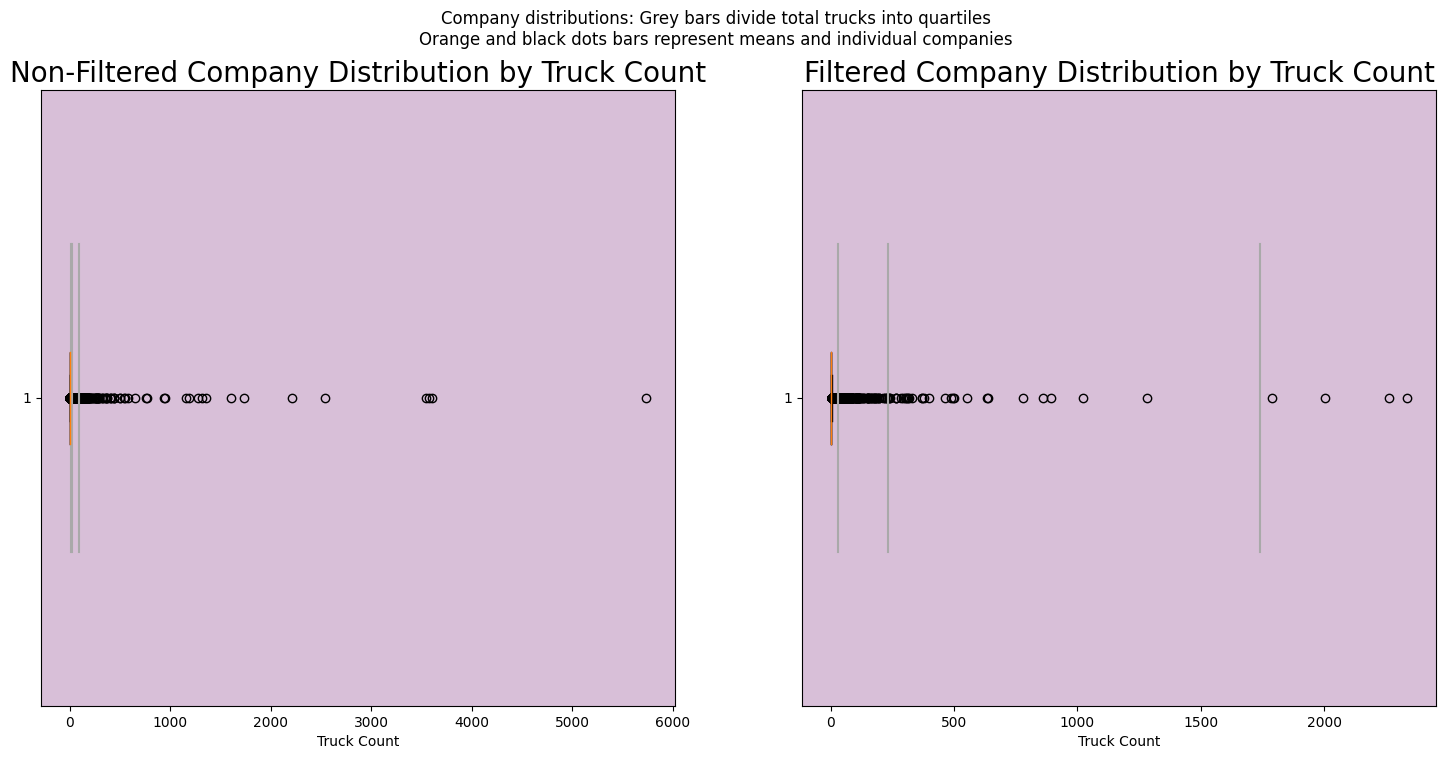

In [ ]:
#Box plot showing the breakdown of the chart
fig, ax = plt.subplots(1, 2, figsize=(18,8))
# Set up plt.subplots
# ax = fig.add_axes([0,0,1,1])
fig.suptitle('Company distributions: Grey bars divide total trucks into quartiles\nOrange and black dots bars represent means and individual companies')

ax[0].boxplot(non_filt['Truck Count'], vert =False)
ax[0].plot([96.0,96.0,96.0],np.arange(0.75,1.5,0.25),color='darkgrey')
ax[0].plot([27.0,27.0,27.0],np.arange(0.75,1.5,0.25),color='darkgrey')
ax[0].plot([9.0,9.0,9.0],np.arange(0.75,1.5,0.25),color='darkgrey')
ax[0].set_title("Non-Filtered Company Distribution by Truck Count", fontsize=20)
ax[0].set_xlabel("Truck Count")
ax[0].set_facecolor("thistle")

ax[1].boxplot(filtered['Truck Count'], vert =False)
ax[1].plot([1740.0,1740.0,1740.0],np.arange(0.75,1.5,0.25),color='darkgrey')
ax[1].plot([232.0,232.0,232.0],np.arange(0.75,1.5,0.25),color='darkgrey')
ax[1].plot([29.0,29.0,29.0],np.arange(0.75,1.5,0.25),color='darkgrey')
ax[1].set_title("Filtered Company Distribution by Truck Count", fontsize=20)
ax[1].set_xlabel("Truck Count")
ax[1].set_facecolor("thistle")


#Here again, Colab's AI didn't work (they wanted to put in [0,0] and I recognized that I only had 1 dimension and only needed a single # inside [] not )

# ax.boxplot(non_filt['Truck Count'], vert =False)
# ax.set_title("Company Distribution by Truck Count", fontsize=20)
# ax.set_xlabel("Truck Count")
# ax.set_facecolor("thistle")

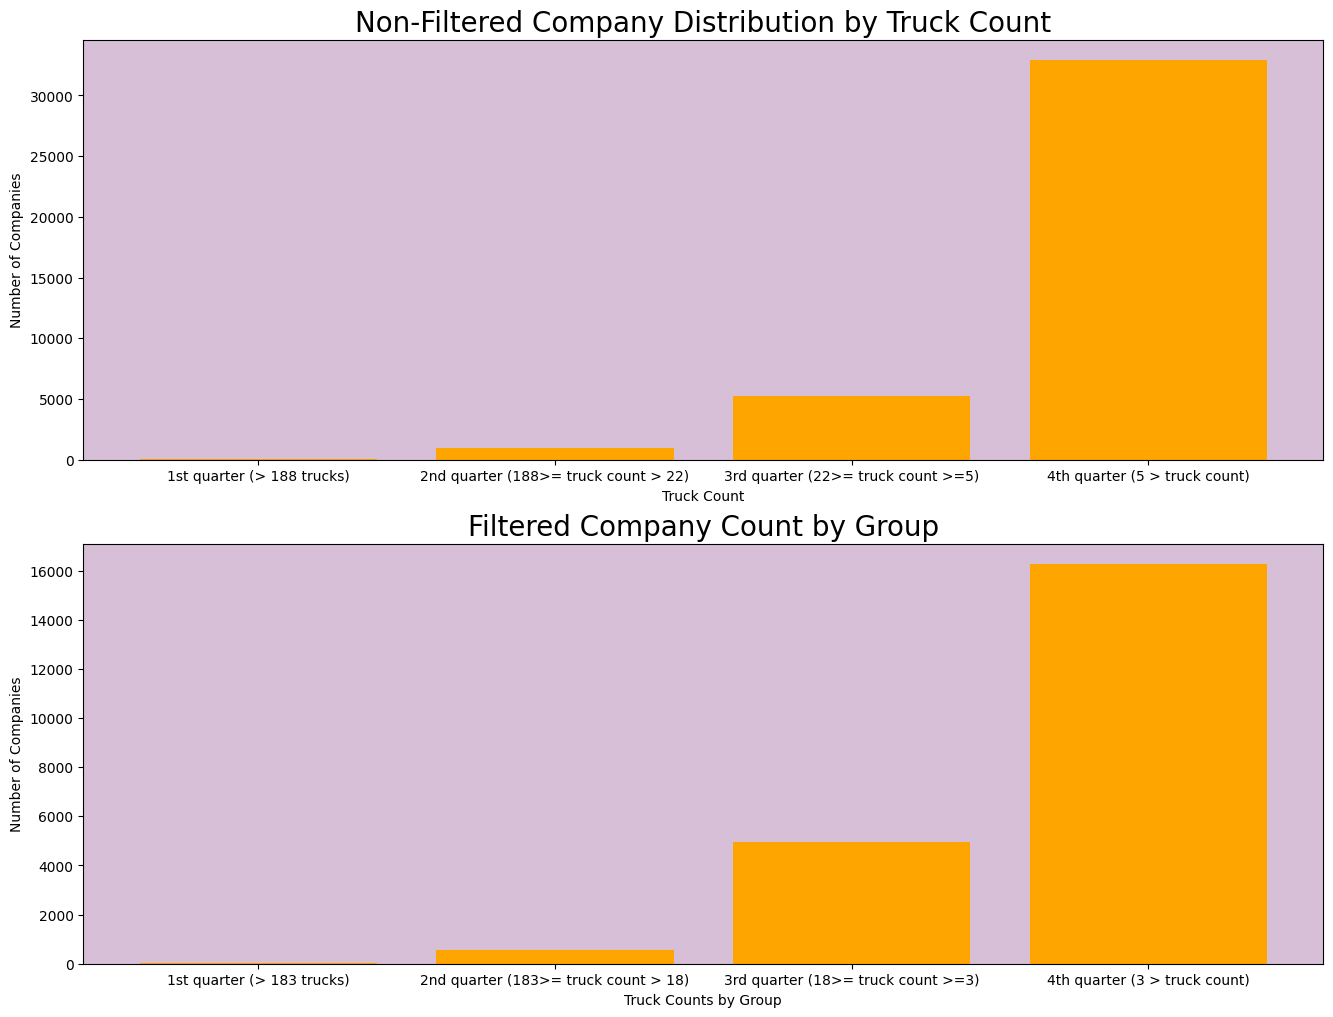

In [ ]:
 # fig = plt.figure(figsize=(12,10))
fig, ax = plt.subplots(2, 1, figsize=(16,12))

# ax = fig.add_axes([0,0,1,1])
ax[0].bar(counts_nf.index, counts_nf['Company count'], label=counts_nf['Company count'],color="orange")
ax[0].set_title("Non-Filtered Company Distribution by Truck Count", fontsize=20)
ax[0].set_ylabel("Number of Companies")
ax[0].set_xlabel("Truck Count")
ax[0].set_facecolor("thistle")

ax[1].bar(counts_f.index, counts_f['Company count'], label=counts_f['Company count'],color="orange")
ax[1].set_title("Filtered Company Count by Group", fontsize=20)
ax[1].set_ylabel("Number of Companies")
ax[1].set_xlabel("Truck Counts by Group")
ax[1].set_facecolor("thistle")

([<matplotlib.patches.Wedge at 0x789e1e626950>,
 [Text(-1.2566708521599987, -0.7233798236966957, '1st quarter (> 183 trucks)'),
  Text(1.2819674353703059, 0.6775392938052232, '2nd quarter (183>= truck count > 18)'),
  Text(1.0667331705877732, 0.9821305120847008, '3rd quarter (18>= truck count >=3)'),
  Text(1.0305804812331283, 1.0200018978910255, '4th quarter (3 > truck count)')],
 [Text(-0.5200017319282754, -0.2993295822193224, '91.6%'),
  Text(0.5304692836015058, 0.2803610870918165, '7.2%'),
  Text(0.4414068292087337, 0.4063988325867728, '1.0%'),
  Text(0.42644709568267375, 0.4220697508514588, '0.2%')])

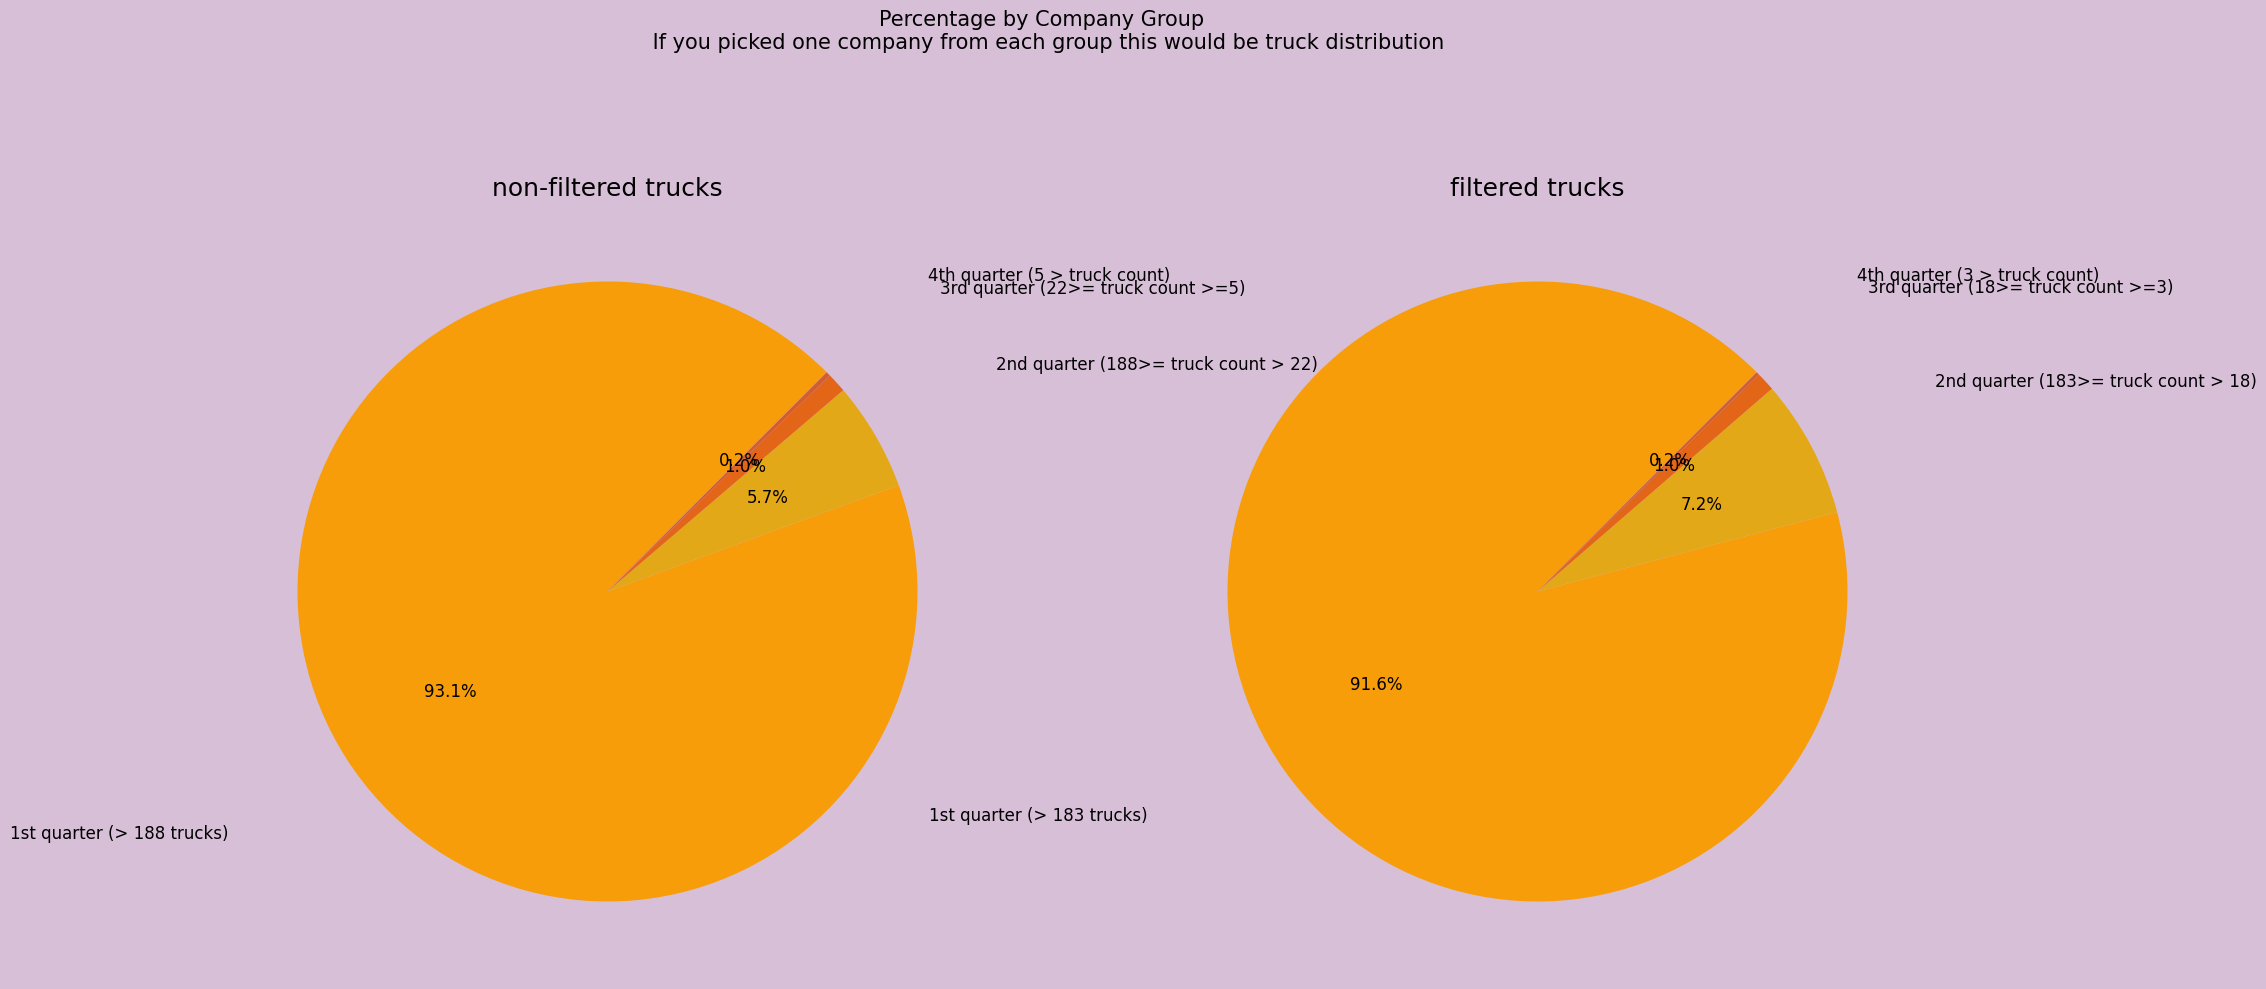

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(22,12))
# ax = fig.add_axes([0,0,1,1])
fig.suptitle("Percentage by Company Group \n If you picked one company from each group this would be truck distribution",fontsize=15)
fig.set_facecolor("thistle")

clrs = ['#F79D0A','#E3A818', '#E36518', "#D45C2F"]

ax[0].set_title("non-filtered trucks", fontsize=18)
ax[0].pie(trucks_per_company_nf['Company count'], labels=trucks_per_company_nf.index,labeldistance=1.45, startangle=45, colors=clrs,textprops={"fontsize":12}, autopct='%1.1f%%')

ax[1].set_title("filtered trucks", fontsize=18)
ax[1].pie(trucks_per_company_f['Company count'], labels=trucks_per_company_f.index, labeldistance=1.45, startangle=45, colors=clrs,textprops={"fontsize":12}, autopct='%1.1f%%')

In [ ]:
#Export the data as csvs
def export_data(n:int, f: bool):
  match f:
    case True:
      df = filtered
      named = "filtered "
      trucks_per_company=pd.DataFrame(trucks_per_company_f)
      counts = counts_f
    case False:
      df = non_filt
      named = "non-filtered "
      trucks_per_company=pd.DataFrame(trucks_per_company_nf)
      counts = counts_nf

  top_qtr=df[df['Truck Count']>=n]

  tq = f'D:\Top quarter of {named}trucks.csv'
  top_qtr.to_csv(tq)
  t_p_c = f'D:\Trucks per company by grouping for {named}trucks.csv'
  trucks_per_company.to_csv(t_p_c)
  cnts = f'D:\Breakdowns for {named}trucks.csv'
  counts.to_csv(cnts)
  return top_qtr

#Note this will only export to Google Colab, so need to download from there.
export_data(184, True)
export_data(189, False)
# top_qtr.to_csv('D:\Trucks per company by grouping for filtered trucks')


Owner Name  Truck Count  \
8132                               CONWAY FREIGHT INC         5736   
12415                               FEDEX FREIGHT INC         3608   
27109                      PENSKE TRUCK LEASING CO LP         3573   
36206                             U HAUL CO OF OREGON         3545   
36391                       UNITED PARCEL SERVICE INC         2542   
12670                               FIRST STUDENT INC         2209   
8043                   CONS FREIGHTWAYS CORP/DELAWARE         1733   
14763                             GREYHOUND LINES INC         1602   
28214                     PROGRESSIVE CASUALTY INS CO         1352   
36596                                USF REDDAWAY INC         1315   
39006                       YELLOW TRANSPORTATION INC         1272   
33239                   STATE FARM MUTUAL AUTO INS CO         1185   
25786                OREGON DEPARTMENT/TRANSPORTATION         1161   
35730                 TRI COUNTY METRO TRANS DISTRICT          945   
24296                              NEW ALBERTSONS INC          934   
33037                               ST PAUL TRAVELERS          764   
27110              PENSKE TRUCK LEASING CO LP  DA6225          762   
35633             TRAVELERS INSURANCE COMPANY C/O IAA          654   
36398                UNITED RENTALS NORTH AMERICA INC          576   
22875                    MID COLUMBIA BUS COMPANY INC          548   
30296                            ROLLINS LEASING CORP          543   
37457                  WASTE MANAGEMENT OF OREGON INC          505   
5898                 CARDMOORE TRUCKING LTD PARTNRSHP          500   
7517                            CNA INSURANCE COMPANY          445   
27741                    PORTLAND GENERAL ELECTRIC CO          444   
30968                                     SAFEWAY INC          437   
35630                             TRAVELERS INSURANCE          411   
7167                                 CITY OF PORTLAND          406   
36574                                            USAA          399   
25788                         OREGON DEPT OF FORESTRY          372   
12304                       FARMERS INSURANCE C/O IAA          367   
31253                                          SB INC          358   
28277                    PROTECTIVE INSURANCE COMPANY          357   
12298                        FARMERS INS CO OF OREGON          353   
22188                            MAY TRUCKING COMPANY          327   
15245                            HANEY TRUCK LINE LLC          322   
30789                          RYDER TRUCK RENTAL INC          320   
38752        WOODPECKER TRUCK AND EQUIPMENT INC DA952          292   
30946                                SAFECO INSURANCE          290   
8476                      CPM DEVELOPMENT CORPORATION          289   
6776                          CHEVRON GLOBAL AVIATION          284   
33240        STATE FARM MUTUAL AUTO INS CO C/O COPART          279   
38506                          WILSON CONSTRUCTION CO          275   
21940                            MARKET TRANSPORT LTD          273   
25301                    OAK HARBOR FREIGHT LINES INC          267   
26622                                      PACIFICORP          264   
30288                      ROLLING FRITO LAY SALES LP          261   
36410                        UNITED STATES BAKERY INC          258   
23521                                  MORSE BROS INC          255   
1803                 AMERICAN MEDICAL RESPONSE NW INC          249   
7769                         COLUMBIA DISTRIBUTING CO          246   
19335                            KERR CONTRACTORS INC          228   
3567                        BEAVERTON SCHOOL DISTRICT          224   
24150                            NATIONWIDE INSURANCE          218   
12399                            FEDERAL EXPRESS CORP          208   
23338                                   MONACO RV LLC          200   
35693                                       TREES LLC